In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/user_behavior_dataset.csv'
dados = pd.read_csv(url, sep = ",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
dados['Operating System'].value_counts()

,count
Operating System,
Android,554
iOS,146


No dataset utilizado, podemos notar que são 554 aparelhos com o sistema operacional Android e 146 aparelhos com o sistema operacional iOS.

In [ ]:
dados['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


Aqui podemos notar que temos um número equilibrado de aparelhos, são 146 Xiaomi Mi 11, 146 iPhone 12, 142 Google Pixel 5, 133 OnePlus 9, 133 Samsung Galaxy S21. Além disso, podemos notar que o principal celular utiliza o principal sistema operacional. Mais abaixo será colocado um gráfico pizza disso.

In [ ]:
dados['Screen On Time (hours/day)'].mean()

5.272714285714286

O número médio de horas com a tela ligada por dia são de 5.27 horas, ou seja, 5 horas e 16 minutos.

In [ ]:
dados['Age'].mean()

38.48285714285714

A média de idade dos usuários é de 38.48 anos.

In [ ]:
dados['Data Usage (MB/day)'].mean()

929.7428571428571

O uso de dados médio diário é de 929.7 MB/dia.

In [ ]:
dados['Gender'].value_counts()

,count
Gender,
Male,364
Female,336


No dataset utilizado, podemos ver que temos 364 homens e 336 mulheres.

In [ ]:
dados['Number of Apps Installed'].mean()

50.68142857142857

Há uma média de aproximadamente 51 aplicativos instalados por aparelho.

In [ ]:
dados.groupby('Gender')['Screen On Time (hours/day)'].sum()
dados.groupby('Gender')['Screen On Time (hours/day)'].mean()

,Screen On Time (hours/day)
Gender,
Female,5.261310
Male,5.283242


Conforme tabela gerada acima, os homens totalizam 1923 horas e as mulheres 1767 horas de uso de tela, o que dá uma média de 5.26 horas por mulher e 5.28 horas por homem.

In [ ]:
base = dados.groupby('Age')['Number of Apps Installed'].mean()
idade_com_mais_app_baixado = base.idxmax()
print(idade_com_mais_app_baixado)

21


A idade com maior número de aplicativos instalados é de 21 anos.

In [ ]:
idade_com_menos_app_baixado= base.idxmin()
print(idade_com_menos_app_baixado)

44


A idade com maior número de aplicativos instalados é de 44 anos.

In [ ]:
dados.groupby('Gender')['Data Usage (MB/day)'].mean()

,Data Usage (MB/day)
Gender,
Female,914.321429
Male,943.978022


Os homens usam em media 944 MB/dia enquanto as mulheres usam 914 MB/dia.

In [ ]:
dados.groupby('Number of Apps Installed')['Data Usage (MB/day)'].mean()

,Data Usage (MB/day)
Number of Apps Installed,
10,180.937500
11,210.916667
12,195.300000
13,199.928571
14,153.230769
...,...
95,1618.000000
96,1992.333333
97,1911.833333


No gráfico acima mostramos a correlação entre o número de aplicativos baixados e o consumo de internet. Apesar de não ser uma regra, o consumo de internet tende a subir conforme o número de aplicativos instalados.

In [ ]:
dados['Number of Apps Installed'].sum()
dados['Data Usage (MB/day)'].sum()

650820

São 35477 aplicativos baixados, consumindo em média, um total de 650.820 MB/dia. Logo, cada app consome em media 18.34 MB/dia.

In [ ]:
dados.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


Com esse comando, podemos ver um resumo com os principais parâmetros estatísticos sobre o dataset utilizado.

In [ ]:
dados.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


Através desse comando, podemos nos certificar que esse dataset já está limpo, ou seja, não há dados do tipo NaN ou dados que são classificados como "sem identificação" ou "indeterminados".

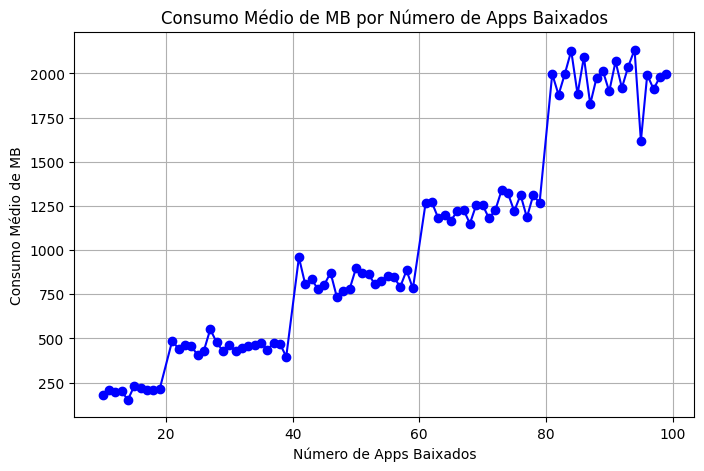

In [ ]:
media_consumo = dados.groupby('Number of Apps Installed')['Data Usage (MB/day)'].mean()
fig1 = plt.figure(figsize=(8, 5))
plt.plot(media_consumo.index, media_consumo.values, marker='o', linestyle='-', color='b')
plt.title('Consumo Médio de MB por Número de Apps Baixados')
plt.xlabel('Número de Apps Baixados')
plt.ylabel('Consumo Médio de MB')
plt.grid(True)
plt.show()

Agora, criamos um gráfico que relaciona o consumo de internet com o número de aplicativos baixados.

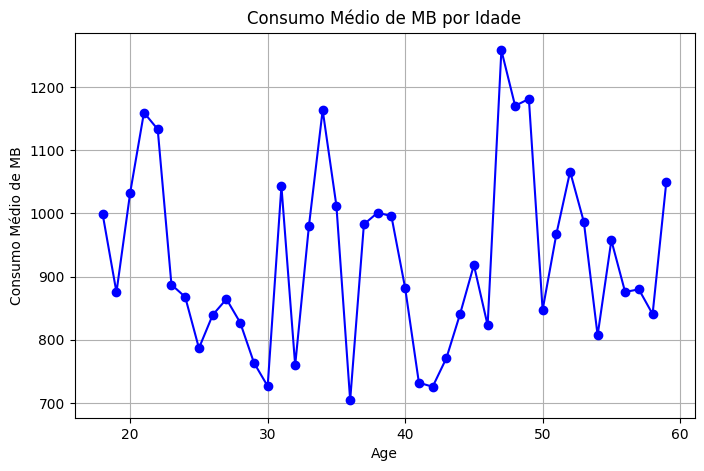

In [ ]:
media_consumo = dados.groupby('Age')['Data Usage (MB/day)'].mean()
fig2 = plt.figure(figsize=(8, 5))
plt.plot(media_consumo.index, media_consumo.values, marker='o', linestyle='-', color='b')
plt.title('Consumo Médio de MB por Idade')
plt.xlabel('Age')
plt.ylabel('Consumo Médio de MB')
plt.grid(True)
plt.show()

Aqui temos um gráfico de idade e consumo de Mb, veja que o gráfico é extremamente irregular.

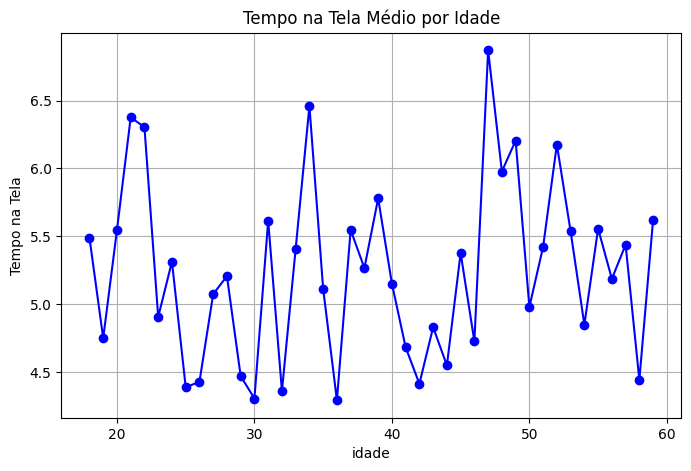

In [ ]:
horas_no_celular = dados.groupby('Age')['Screen On Time (hours/day)'].mean()
fig3 = plt.figure(figsize=(8, 5))
plt.plot(horas_no_celular.index, horas_no_celular.values, marker='o', linestyle='-', color='b')
plt.title('Tempo na Tela Médio por Idade')
plt.xlabel('idade')
plt.ylabel('Tempo na Tela')
plt.grid(True)
plt.show()

Veja que, de modo geral, o gráfico também é irregular, mas note que o formato dele, acompanha o gráfico de idade e consumo de internet,  ou seja, as idades que mais consomem internet são as idades que mais consomem dados, o que faz sentido, agora vamos fazer um gráfico que compara a o tempo de tela com o consumo de Mb/day.

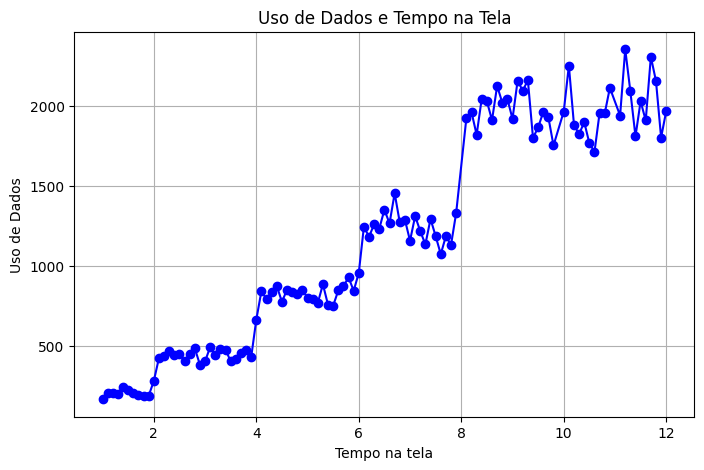

In [ ]:
tempo_por_dado = dados.groupby('Screen On Time (hours/day)')['Data Usage (MB/day)'].mean()
fig4 = plt.figure(figsize=(8, 5))
plt.plot(tempo_por_dado.index, tempo_por_dado.values, marker='o', linestyle='-', color='b')
plt.title('Uso de Dados e Tempo na Tela')
plt.xlabel('Tempo na tela')
plt.ylabel('Uso de Dados')
plt.grid(True)
plt.show()

Assim, podemos concluir que, de fato, quanto mais tempo passa, mais dados são consumidos.

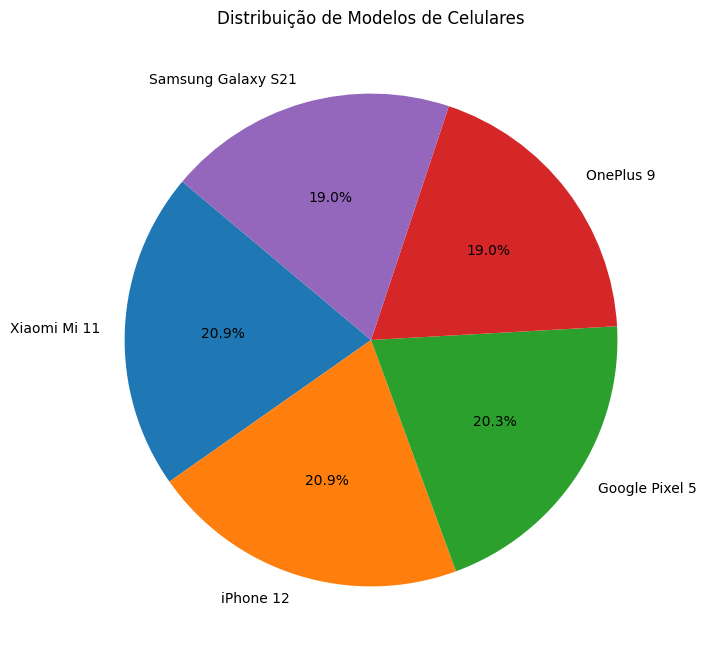

In [ ]:
contagem_modelos = dados['Device Model'].value_counts()
fig5 = plt.figure(figsize=(8, 8))
plt.pie(contagem_modelos, labels=contagem_modelos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Modelos de Celulares')
plt.show()

Acima temos um gráfico de pizza comparando o número de modelos de celulares.

In [ ]:
bins = [18, 25, 30, 40, 50, 60]
labels = ['18-25', '25-30', '30-40', '40-50', '50-60']
dados['Age Group'] = pd.cut(dados['Age'], bins=bins, labels=labels, right=False)
favorite_models = dados.groupby('Age Group', observed=False)['Device Model'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
print(favorite_models)

Age Group
18-25    Google Pixel 5
25-30      Xiaomi Mi 11
30-40    Google Pixel 5
40-50         OnePlus 9
50-60         iPhone 12
Name: Device Model, dtype: object


Nesse gráfico, analisamos qual modelo de celular é o preferido em cada faixa etária definida.

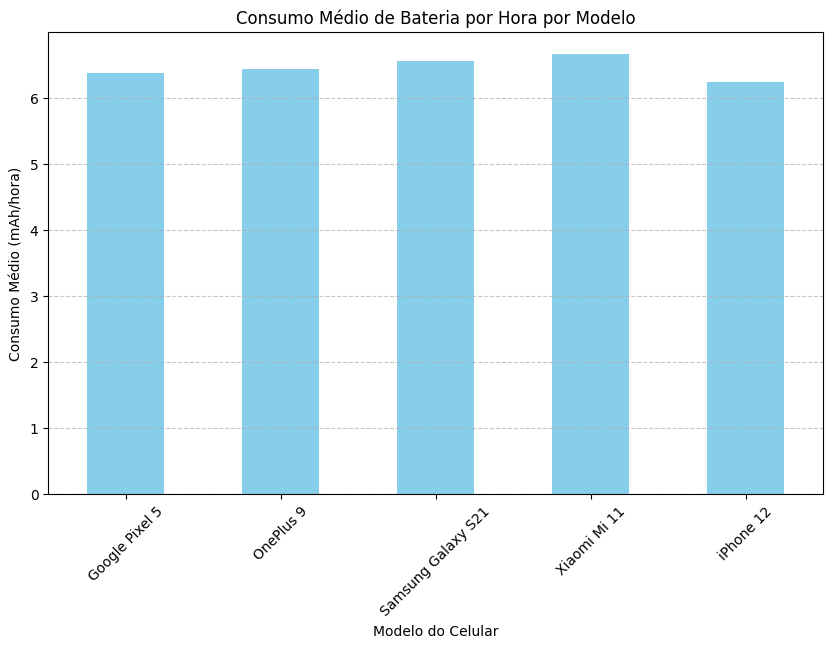

In [ ]:
dados['consumo_de_energia'] = dados['Battery Drain (mAh/day)'] / dados['App Usage Time (min/day)']
lista= dados.groupby('Device Model')['consumo_de_energia'].mean()
fig6 = plt.figure(figsize=(10, 6))
lista.plot(kind='bar', color='skyblue')
plt.title('Consumo Médio de Bateria por Hora por Modelo')
plt.xlabel('Modelo do Celular')
plt.ylabel('Consumo Médio (mAh/hora)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Veja que podemos fazer uma estimativa sobre qual modelo de celular consome mais bateria, com base no número de minutos utilizando aplicativos, assim, podemos calcular quantos mAh por minuto de uso cada modelo necessita para funcionar. Lógico que esse raciocínio precisa que consideremos que os usos de aplicativo são no todo "iguais" para todos os usuários. Ou seja, que um usuário médio de iphone o utilize da mesma forma que um usuário de Xiaomi. Apesar dessa forma de calcular o consumo médio de bateria por modelo pode não ser muito precisa, caso haja uma discrepância significatica entre os modelos analisados, podemos tirar alguma conclusão sobre o consumo de bateria. Analisando o gráfico, vemos que o consumo entres os aparelhos é bem próximo.

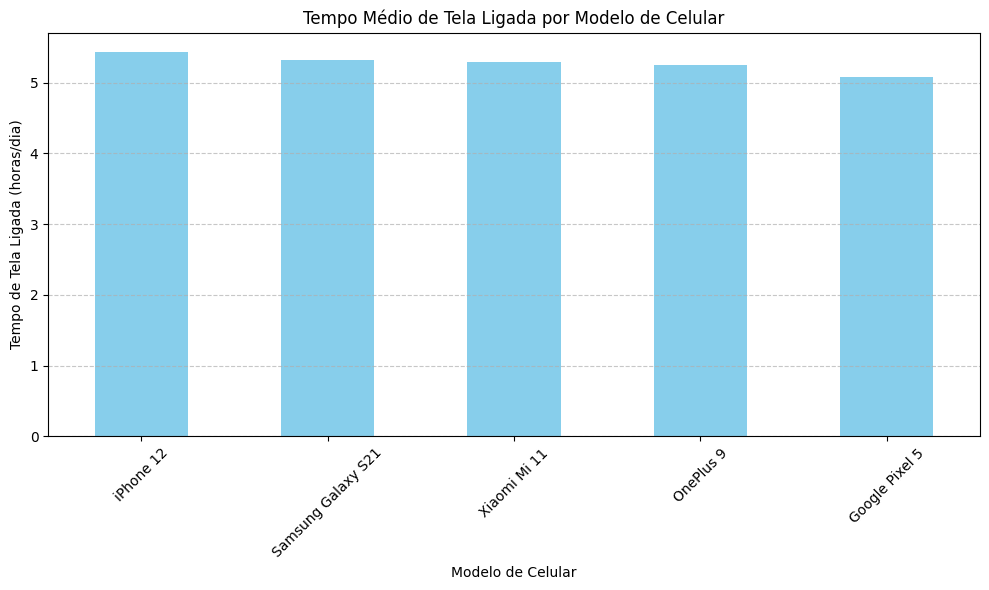

In [ ]:
screen_time_by_model = dados.groupby('Device Model')['Screen On Time (hours/day)'].mean().sort_values(ascending=False)
fig7 = plt.figure(figsize=(10, 6))
screen_time_by_model.plot(kind='bar', color='skyblue')
plt.title('Tempo Médio de Tela Ligada por Modelo de Celular')
plt.xlabel('Modelo de Celular')
plt.ylabel('Tempo de Tela Ligada (horas/dia)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

No gráfico acima, podemos ver a analise de qual modelo passa em média mais tempo com a tela ligada.

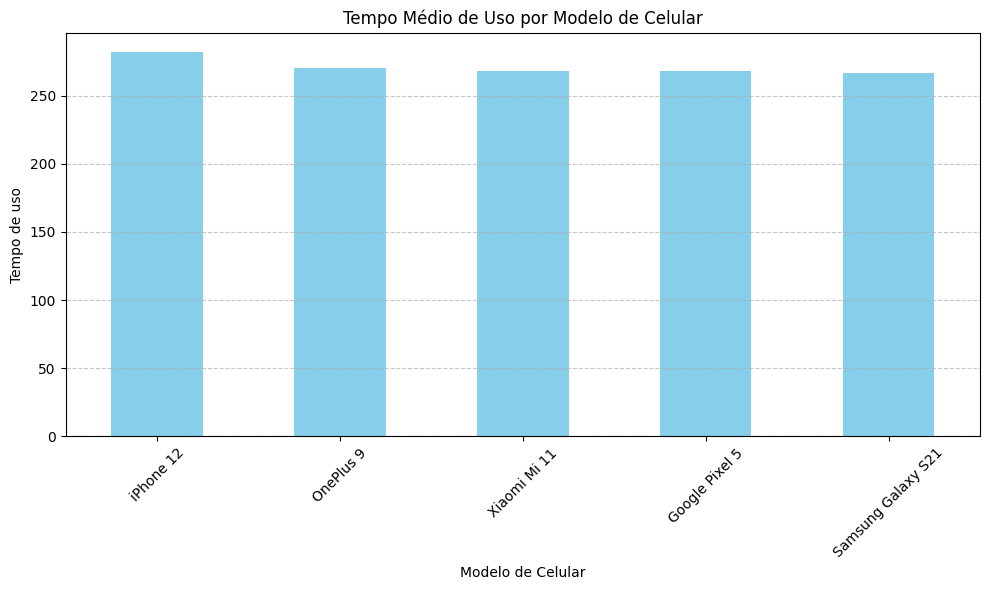

In [ ]:
tempo_de_uso = dados.groupby('Device Model')['App Usage Time (min/day)'].mean().sort_values(ascending=False)
fig8 = plt.figure(figsize=(10, 6))
tempo_de_uso.plot(kind='bar', color='skyblue')
plt.title('Tempo Médio de Uso por Modelo de Celular')
plt.xlabel('Modelo de Celular')
plt.ylabel('Tempo de uso')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Veja que de certa maneira, a quantidade de tempo com a tela ligada, é proporcional ao tempo de uso, e vice-versa. Embora isso possa parecer óbvio, isso significa que a razão entre o tempo de uso dos apps e o tempo de tela ligada é constante.

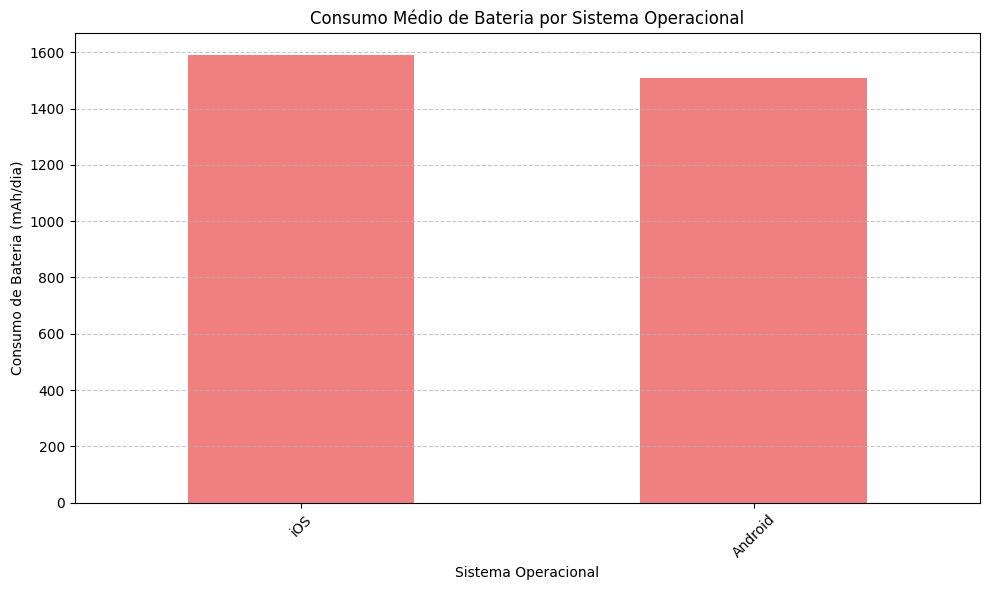

In [ ]:
battery_usage_by_os = dados.groupby('Operating System')['Battery Drain (mAh/day)'].mean().sort_values(ascending=False)
fig9 = plt.figure(figsize=(10, 6))
battery_usage_by_os.plot(kind='bar', color='lightcoral')
plt.title('Consumo Médio de Bateria por Sistema Operacional')
plt.xlabel('Sistema Operacional')
plt.ylabel('Consumo de Bateria (mAh/dia)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como podemos ver, o sistema operacional iOS consome mais bateria que o Android.

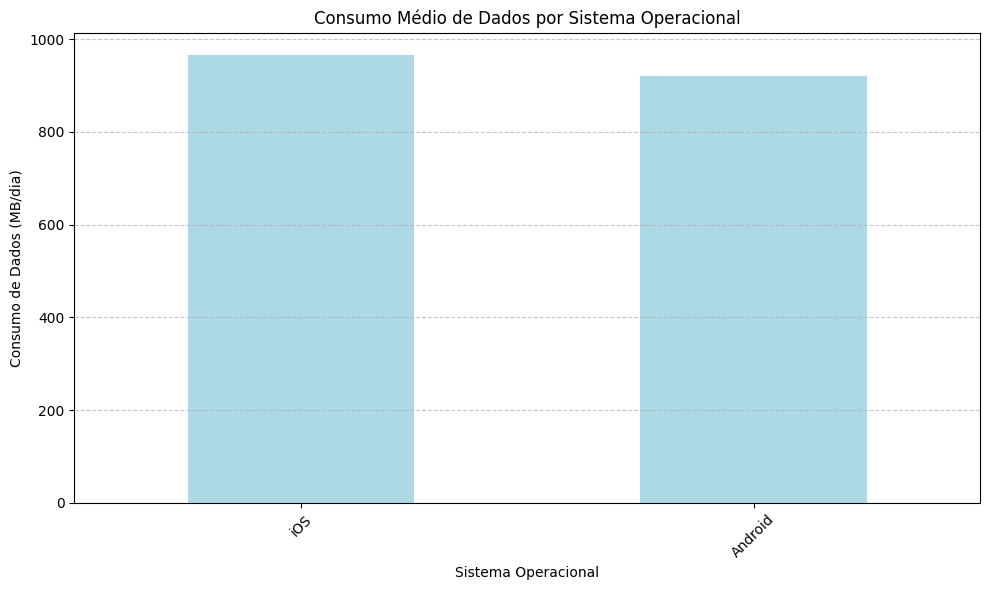

In [ ]:
data_usage_by_os = dados.groupby('Operating System')['Data Usage (MB/day)'].mean().sort_values(ascending=False)
fig10 = plt.figure(figsize=(10, 6))
data_usage_by_os.plot(kind='bar', color='lightblue')
plt.title('Consumo Médio de Dados por Sistema Operacional')
plt.xlabel('Sistema Operacional')
plt.ylabel('Consumo de Dados (MB/dia)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Como podemos notar, em média, o iOS consome mais dados. Lembre-se que tanto nessa analise quanto na analise anterior, estamos fazendo apenas um rápido levantamento, e que estamos considerando que há uma distribuição homogênea e uniforme das necessidades dos usuários. Tudo que um usuário de um modelo X faz, o usuário o modelo Y faz, no mesmo tempo e da mesma forma.

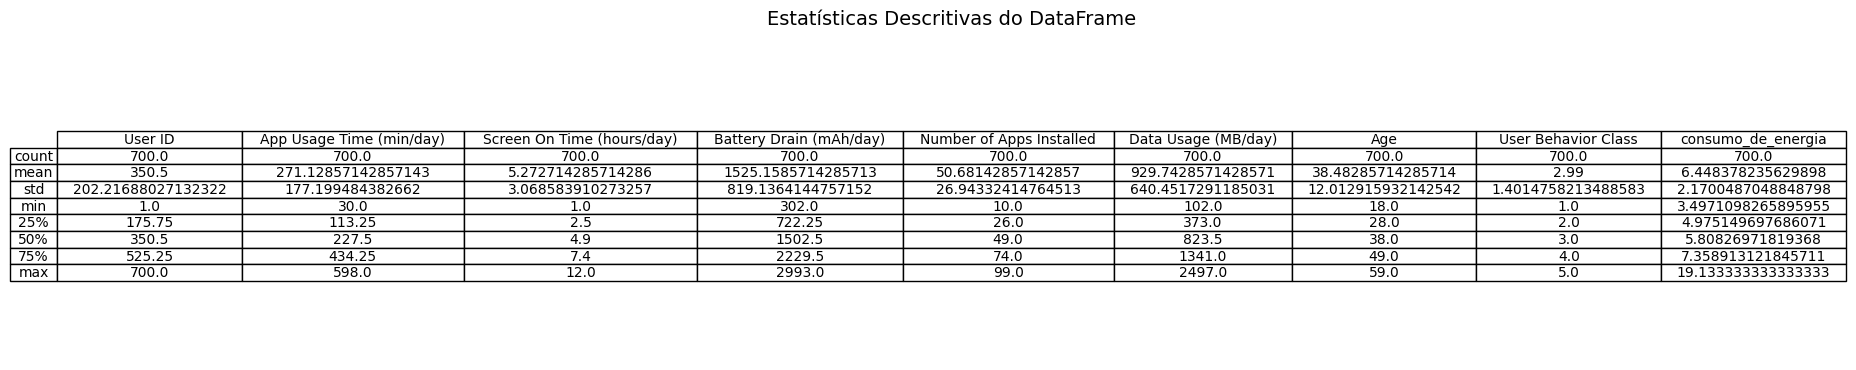

In [ ]:
descricao = dados.describe()
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
tabela = ax.table(cellText=descricao.values,colLabels=descricao.columns,rowLabels=descricao.index,loc='center',cellLoc='center',rowLoc='center')
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.auto_set_column_width(col=list(range(len(descricao.columns))))
plt.title('Estatísticas Descritivas do DataFrame', fontsize=14, pad=20)
plt.show()

A tabela acima exibe um resumo estatístico proporcionado pela $função.describe()$.

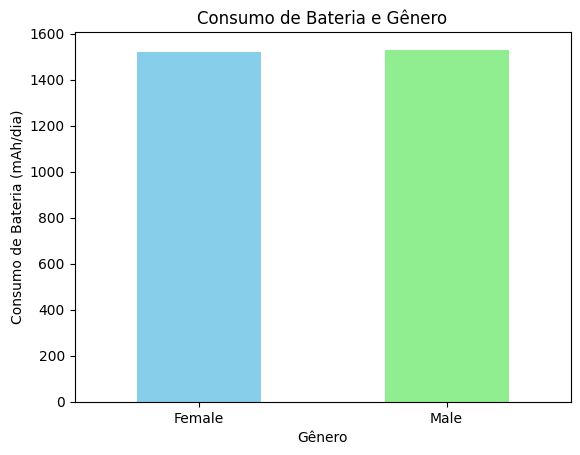

In [ ]:
dados['consumo por genero'] = dados['Battery Drain (mAh/day)'] / dados['Screen On Time (hours/day)']
consumo = dados.groupby('Gender')['Battery Drain (mAh/day)'].mean()
fig11, ax = plt.subplots()
consumo.plot(kind='bar', color=['skyblue', 'lightgreen'], ax=ax)
ax.set_title('Consumo de Bateria e Gênero')
ax.set_xlabel('Gênero')
ax.set_ylabel('Consumo de Bateria (mAh/dia)')
ax.set_xticks(range(len(consumo.index)))
ax.set_xticklabels(consumo.index, rotation=0)
plt.show()

Conforme tabela acima, podemos notar que ambos os generos possuem um consumo de bateria bem similares.

Note que até agora consideramos que todos os usuários possuem um comportamento uniforme entre si.
Como eu já disse antes, isso faz sentido quando estamos olhando se uma forma macroscópica.
Mas, sabemos que esse raciocínio pode não ser tão preciso às vezes. No entanto, nesse dataset, existe a categoria de comportamento do usuário, veja um rápido resumo de como que ela funciona:

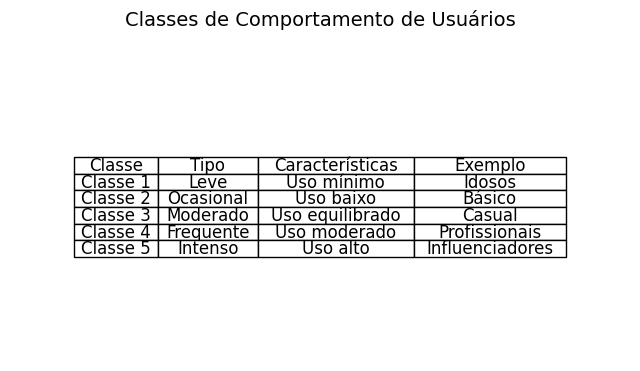

In [ ]:
dados_classes = [
    ["Classe 1", "Leve", "Uso mínimo", "Idosos"],
    ["Classe 2", "Ocasional", "Uso baixo", "Básico"],
    ["Classe 3", "Moderado", "Uso equilibrado", "Casual"],
    ["Classe 4", "Frequente", "Uso moderado", "Profissionais"],
    ["Classe 5", "Intenso", "Uso alto", "Influenciadores"]
]
fig12, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
tabela = ax.table(cellText=dados_classes,
                  colLabels=["Classe", "Tipo", "Características", "Exemplo"],
                  loc='center',
                  cellLoc='center',
                  rowLoc='center')
tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.auto_set_column_width(col=list(range(len(dados_classes[0]))))
plt.title("Classes de Comportamento de Usuários", fontsize=14, pad=20)
plt.show()

Sendo assim, vamos confirmar se os usuários estão ranqueados de forma correta, isso é, se quanto maior é o numero do usuário, mais dados, bateria, tempo em aplicativos e tempo de tela ligado ele tem.

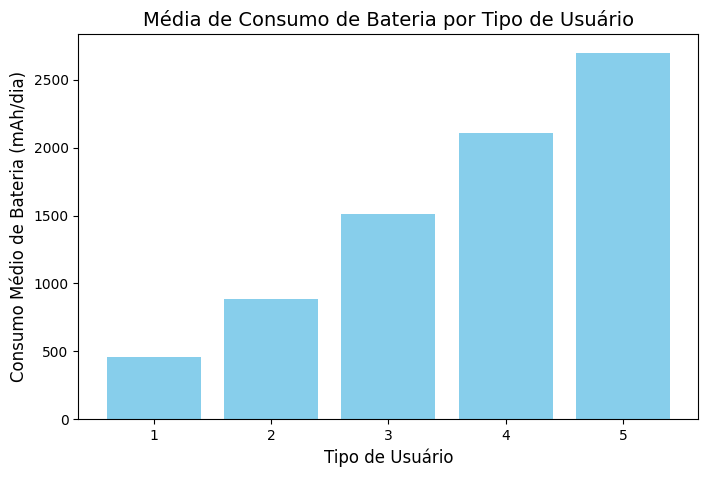

In [ ]:
media_bateria = dados.groupby('User Behavior Class')['Battery Drain (mAh/day)'].mean()
fig13, ax = plt.subplots(figsize=(8, 5))
ax.bar(media_bateria.index, media_bateria.values, color='skyblue')
ax.set_title('Média de Consumo de Bateria por Tipo de Usuário', fontsize=14)
ax.set_xlabel('Tipo de Usuário', fontsize=12)
ax.set_ylabel('Consumo Médio de Bateria (mAh/dia)', fontsize=12)
plt.show()

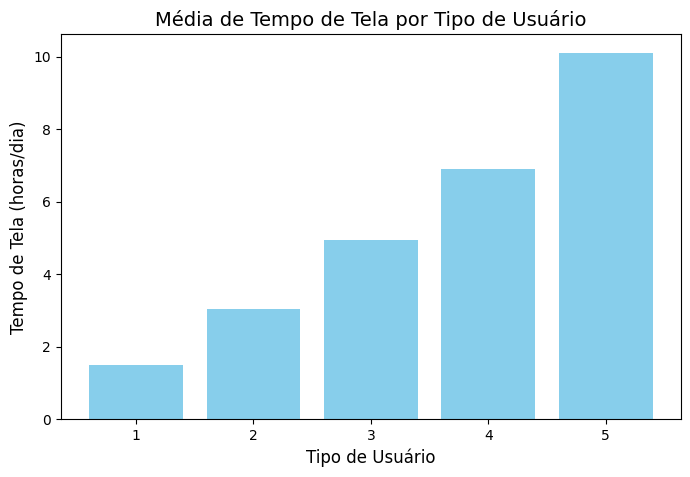

In [ ]:
media_t = dados.groupby('User Behavior Class')['Screen On Time (hours/day)'].mean()
fig14, ax = plt.subplots(figsize=(8, 5))
ax.bar(media_t.index, media_t.values, color='skyblue')
ax.set_title('Média de Tempo de Tela por Tipo de Usuário', fontsize=14)
ax.set_xlabel('Tipo de Usuário', fontsize=12)
ax.set_ylabel('Tempo de Tela (horas/dia)', fontsize=12)
plt.show()

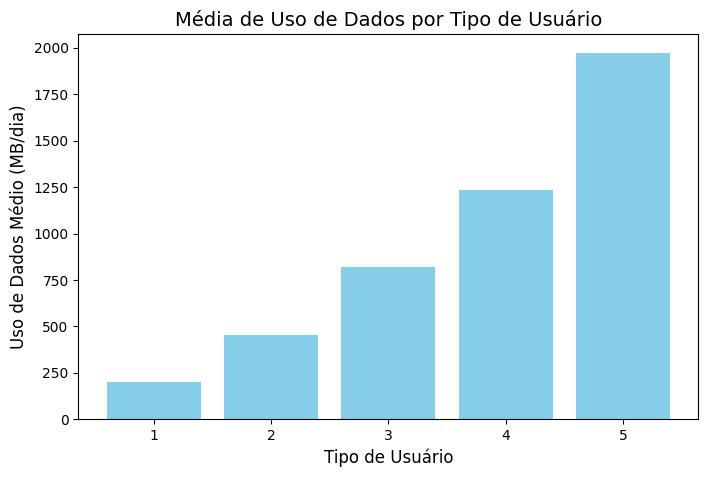

In [ ]:
media_dad = dados.groupby('User Behavior Class')['Data Usage (MB/day)'].mean()
fig15, ax = plt.subplots(figsize=(8, 5))
ax.bar(media_dad.index, media_dad.values, color='skyblue')
ax.set_title('Média de Uso de Dados por Tipo de Usuário', fontsize=14)
ax.set_xlabel('Tipo de Usuário', fontsize=12)
ax.set_ylabel('Uso de Dados Médio (MB/dia)', fontsize=12)
plt.show()

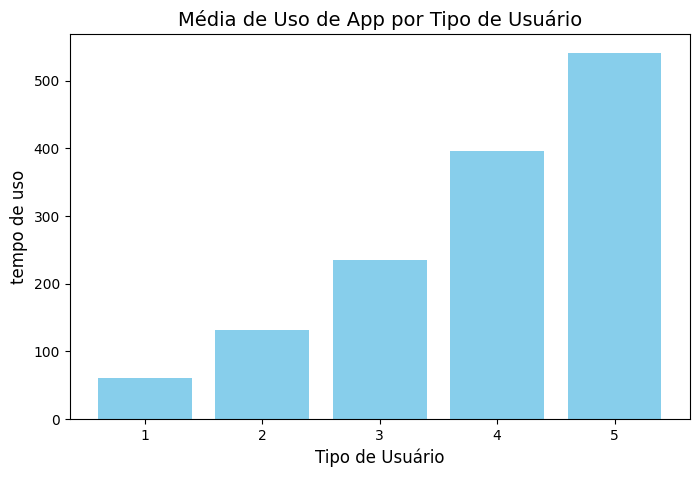

In [ ]:
media_d = dados.groupby('User Behavior Class')['App Usage Time (min/day)'].mean()
fig16, ax = plt.subplots(figsize=(8, 5))
ax.bar(media_d.index, media_d.values, color='skyblue')
ax.set_title('Média de Uso de App por Tipo de Usuário', fontsize=14)
ax.set_xlabel('Tipo de Usuário', fontsize=12)
ax.set_ylabel('tempo de uso', fontsize=12)
plt.show()

Veja que em todas as análises temos que, de fato, quanto maior o número do tipo do usuário, maior é o consumo.